In [20]:
import pandas as pd
import numpy as np
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

# Age Rating and its effect on box office
This section explores how age rating might affect how well a movie will perform

In [21]:
budget_data = pd.read_csv('../data/cleaned_budgets.csv')
gross_data = pd.read_csv('../data/cleaned_movie_gross.csv')
movie_data = pd.read_csv('../data/cleaned_movies.csv')

A quick look at the budget data merged with gross earnings 

In [22]:
data = budget_data.merge(gross_data, left_on='movie', right_on='title')
data

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,return_ratio,title,studio,domestic_gross_y,foreign_gross,year
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.55,Pirates of the Caribbean: On Stranger Tides,BV,241100000.00,804600000,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.24,Avengers: Age of Ultron,BV,459000000.00,946400000,2015
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,5.83,Avengers: Infinity War,BV,678800000.00,"1,369.5",2018
3,9,2017-11-17,Justice League,300000000,229024295,655945209,1.19,Justice League,WB,229000000.00,428900000,2017
4,10,2015-11-06,Spectre,300000000,200074175,879620923,1.93,Spectre,Sony,200100000.00,680600000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1237,68,2012-04-27,Sound of My Voice,135000,408015,429448,2.18,Sound of My Voice,FoxS,408000.00,NaN,2012
1238,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,24.75,Your Sister's Sister,IFC,1600000.00,NaN,2012
1239,80,2015-07-10,The Gallows,100000,22764410,41656474,415.56,The Gallows,WB (NL),22800000.00,20200000,2015
1240,86,2017-07-07,A Ghost Story,100000,1594798,2769782,26.70,A Ghost Story,A24,1600000.00,NaN,2017


We'll look at the mean box office earnings for R rated movies, and then movies that are neither R or NR movies

In [23]:
data_rt = pd.read_csv('../data/cleaned_rt_info.csv')
data_r_rated = data_rt[data_rt['rating'] == 'R']


data_r_rated['box_office'].mean().round(2)

23231760.9

In [24]:
data_not_r = data_rt[(data_rt['rating'] != 'R') & (data_rt['rating'] != 'NR')]
data_not_r['box_office'].mean().round(2)

53306675.37

We can see that the non r rated movies actually performed a fair amount better than he R rated movies. This is likely because it is more accessible to another part of the market, children.

In [25]:
data_rt['rating'].value_counts()

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

We can then graph this to see the more granular distribution of the age ratings

In [26]:
data_rt = pd.read_csv('../data/cleaned_rt_info.csv')

data_r_rated = data_rt[data_rt['rating'] == 'R']
data_not_r = data_rt[(data_rt['rating'] != 'R') & (data_rt['rating'] != 'NR')]

r_rated_profit = data_r_rated['box_office'].mean().round(2)
non_r_rated_profit = data_not_r['box_office'].mean().round(2)

In [27]:
print(f'Non-R Rated Profit: {non_r_rated_profit}')
print(f'R Rated Profit: {r_rated_profit}')

Non-R Rated Profit: 53306675.37
R Rated Profit: 23231760.9


In [28]:
data_r_rated = data_rt[data_rt['rating'] == 'R']
r_genre_profit = data_r_rated.groupby('genre')['box_office'].mean().sort_values(ascending=False)
rating_df = data_rt.groupby('rating')['box_office'].mean().sort_values(ascending=False)

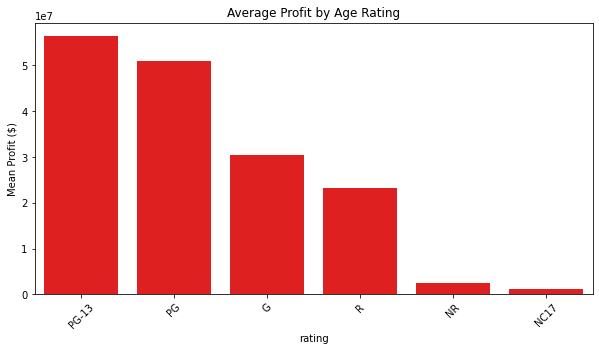

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x=rating_df.index, y=rating_df.values, color='red')
plt.xticks(rotation=45)
plt.ylabel('Mean Profit ($)')
plt.title('Average Profit by Age Rating')
plt.show()

We can focus on pg13 and pg as those have the highest earnings.

## Exploring ROI per genre 
This section will explore which genre will have the highest ROI with a lower budget since this will be our first foray in the film industry

In [30]:
df_gross = pd.read_csv('../data/cleaned_movie_gross.csv', index_col=0)
df_budgets = pd.read_csv('../data/cleaned_budgets.csv', index_col=0)
df_movies = pd.read_csv('../data/cleaned_movies.csv', index_col=0)
conn = sqlite3.connect('../data/im.db')

In [31]:
df_gross

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.00,652000000,2010
Alice in Wonderland (2010),BV,334200000.00,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
Inception,WB,292600000.00,535700000,2010
Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.00,NaN,2018
Edward II (2018 re-release),FM,4800.00,NaN,2018
El Pacto,Sony,2500.00,NaN,2018


df_gross and df_budgets seem to essentially store the same data, though df_gross has the added row of studio. We'll look at the budgets table two ways, one looking at the return_ratio and another at the raw gross number

In [32]:
df_budgets['release_date'] = pd.to_datetime(df_budgets['release_date'])
df_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_ratio
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,5.53
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.55
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-0.57
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.24
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.15
...,...,...,...,...,...,...
77,2004-12-31,The Mongol King,7000,900,900,-0.87
78,2018-12-31,Red 11,7000,0,0,-1.00
80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-0.73


We'll settle on a budget of 2 million since at the budget, the movies still averaged around a 100 roi

In [33]:
df_high_return = df_budgets.sort_values('return_ratio', ascending=False).head(30)
df_high_return.mean(numeric_only=True)

production_budget     1929436.67
domestic_gross       51048412.47
worldwide_gross     110674630.43
return_ratio              105.35
dtype: float64

In [34]:
df_high_gross = df_budgets.sort_values('worldwide_gross', ascending=False).head(20)
df_high_gross.mean(numeric_only=True)

production_budget    217080000.00
domestic_gross       509391552.15
worldwide_gross     1454594828.85
return_ratio                 6.46
dtype: float64

When comparing the averages we can see that there is a pretty disparity between the highest grossing, and the highest return ratio movies. The highest return ratio movies average a significantly lower production budget while the opposite is true for the highest grossing movies. Since we are a new studio, I think it is a good idea to pay attention to the lower production budget movies with a high return ratio. 

In [35]:
df_top_return = df_budgets.sort_values('return_ratio', ascending=False)
df_top_return = df_top_return[(df_top_return['production_budget'] < 2000000) & (df_top_return['worldwide_gross'] > 0) & (df_top_return['return_ratio'] > 2)]
#df_top_return = df_top_return[(df_top_return['production_budget'] < 200000000) & (df_top_return['production_budget'] > 125000000) & (df_top_return['worldwide_gross'] >)]
df_top_return.rename(columns={'movie': 'primary_title'}, inplace=True)
top_return_movies = df_top_return['primary_title'].to_list()
df_top_return

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,return_ratio
id,,,,,,
93,2009-09-25,Paranormal Activity,450000,107918810,194183034,430.52
80,2015-07-10,The Gallows,100000,22764410,41656474,415.56
10,2004-05-07,Super Size Me,65000,11529368,22233808,341.06
82,2005-08-05,My Date With Drew,1100,181041,181041,163.58
57,2007-05-16,Once,150000,9445857,23323631,154.49
...,...,...,...,...,...,...
41,2014-06-06,Obvious Child,1000000,3122616,3324070,2.32
23,2002-11-15,El crimen de padre Amaro,1800000,5719000,5719000,2.18
68,2012-04-27,Sound of My Voice,135000,408015,429448,2.18


Since we're looking at the movies with the highest returns, we'll also filter on a max of 2,000,000 for budget since that was the average for the top 30 highest return movies, which still resulted in a return ratio of about 100. The movies will also need to have a return_ratio greater than 2.

Next we will look at the sql database so that we can see if we can get more data for each movie

Given the top return movies from above, if we look for those from the sql database, the genres column could be a useful entrant.

In [36]:
#Get the rows that exist in the list from above
query = "SELECT * FROM movie_basics WHERE primary_title in " + str(tuple(top_return_movies))

df_genre = pd.read_sql(query, conn)
df_genre

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0326592,The Overnight,The Overnight,2010,88.00,None
1,tt10227710,Brick,Brick,2019,93.00,"Drama,Family,Romance"
2,tt1120985,Blue Valentine,Blue Valentine,2010,112.00,"Drama,Romance"
3,tt1320244,The Last Exorcism,The Last Exorcism,2010,87.00,"Drama,Horror,Thriller"
4,tt1366338,Lowriders,Lowriders,2016,98.00,"Adventure,Crime,Drama"
...,...,...,...,...,...,...
91,tt8681390,Like Crazy,Like Crazy,2018,NaN,Drama
92,tt8883462,Home,Home,2017,NaN,"Drama,Family"
93,tt9248762,The Terrorist,The Terrorist,2018,NaN,Thriller
94,tt9281490,Home,Home,2018,50.00,Documentary


Here we create a dictionary that counts the number of genres and sort them by which appears the most

Next we'll find the movies from before in the sql database so that we can combine the dataframes and get a better picture 

In [37]:
pd.read_sql(
"""
SELECT *
from movie_ratings
join movie_basics
using(movie_id)
where primary_title in 
"""+ str(tuple(top_return_movies)), conn)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0326592,7.50,24,The Overnight,The Overnight,2010,88.00,None
1,tt1120985,7.40,170089,Blue Valentine,Blue Valentine,2010,112.00,"Drama,Romance"
2,tt1320244,5.60,45815,The Last Exorcism,The Last Exorcism,2010,87.00,"Drama,Horror,Thriller"
3,tt1366338,5.70,1954,Lowriders,Lowriders,2016,98.00,"Adventure,Crime,Drama"
4,tt1441326,6.90,45873,Martha Marcy May Marlene,Martha Marcy May Marlene,2011,102.00,"Drama,Mystery,Thriller"
...,...,...,...,...,...,...,...,...
61,tt6265828,6.80,46280,A Ghost Story,A Ghost Story,2017,92.00,"Drama,Fantasy,Romance"
62,tt7153766,6.40,32049,Unsane,Unsane,2018,98.00,"Drama,Horror,Mystery"
63,tt8161226,5.80,244,All You Need Is Love,All You Need Is Love,2018,113.00,"Comedy,Romance"
64,tt8601408,8.40,32,Home,Dom,2018,71.00,"Drama,Romance,Thriller"


We'll combine the sql database with the top return movies we found earlier so that we can attribute genres with a return ratio

In [38]:
df_genre_return = pd.merge(df_genre, df_top_return[['primary_title', 'return_ratio', 'production_budget']], on=['primary_title'], how='left')
genre_list = df_genre_return['genres'].str.split(',').to_list()
return_list = df_genre_return['return_ratio'].to_list()
budget_list = df_genre_return['production_budget'].to_list()
df_genre_return

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,return_ratio,production_budget
0,tt0326592,The Overnight,The Overnight,2010,88.00,None,4.83,200000
1,tt10227710,Brick,Brick,2019,93.00,"Drama,Family,Romance",8.43,450000
2,tt1120985,Blue Valentine,Blue Valentine,2010,112.00,"Drama,Romance",15.57,1000000
3,tt1320244,The Last Exorcism,The Last Exorcism,2010,87.00,"Drama,Horror,Thriller",37.98,1800000
4,tt1366338,Lowriders,Lowriders,2016,98.00,"Adventure,Crime,Drama",5.76,916000
...,...,...,...,...,...,...,...,...
91,tt8681390,Like Crazy,Like Crazy,2018,NaN,Drama,13.91,250000
92,tt8883462,Home,Home,2017,NaN,"Drama,Family",88.59,500000
93,tt9248762,The Terrorist,The Terrorist,2018,NaN,Thriller,6.80,25000
94,tt9281490,Home,Home,2018,50.00,Documentary,88.59,500000


In [39]:
def moving_average(curr_avg, num, count):
    curr_avg + (num - curr_avg)/ count
    return curr_avg

In [40]:
genre_roi = {}

#Ugly function to calculate the average roi for each genre
for genres, roi, budget in zip(genre_list, return_list, budget_list):
    if genres != None:
        for genre in genres:
            if genre in genre_roi:
                #calculate average roi
                curr_avg = genre_roi[genre]['average_roi']
                num = roi
                count = genre_roi[genre]['count']
                genre_roi[genre]['average_roi'] = moving_average(curr_avg, num, count)
                #calculate average budget
                budg_avg = genre_roi[genre]['average_cost']
                b_num = budget
                genre_roi[genre]['average_cost'] = moving_average(budg_avg, b_num, count)
                genre_roi[genre]['count'] += 1
            else:
                genre_roi[genre] = {'average_roi' : roi, 'average_cost': budget, 'count': 1}

Here we get a breakdown of the return ratios for all the genres that occur in our dataset, though some have very low counts, we will have to decide if we still keep those or if we expand our scope to include more movies.

In [41]:
genre_roi = dict(sorted(genre_roi.items(), key=lambda item: item[1]['average_roi'], reverse=True))
genre_roi

{'Animation': {'average_roi': 88.59, 'average_cost': 500000, 'count': 2},
 'War': {'average_roi': 88.59, 'average_cost': 500000, 'count': 1},
 'Horror': {'average_roi': 37.98, 'average_cost': 1800000, 'count': 19},
 'Thriller': {'average_roi': 37.98, 'average_cost': 1800000, 'count': 15},
 'Fantasy': {'average_roi': 11.93, 'average_cost': 1800000, 'count': 2},
 'Biography': {'average_roi': 10.5, 'average_cost': 1000000, 'count': 5},
 'Sci-Fi': {'average_roi': 10.28, 'average_cost': 500000, 'count': 5},
 'History': {'average_roi': 10.28, 'average_cost': 500000, 'count': 3},
 'Drama': {'average_roi': 8.43, 'average_cost': 450000, 'count': 51},
 'Family': {'average_roi': 8.43, 'average_cost': 450000, 'count': 5},
 'Romance': {'average_roi': 8.43, 'average_cost': 450000, 'count': 17},
 'Comedy': {'average_roi': 7.48, 'average_cost': 50000, 'count': 18},
 'Action': {'average_roi': 7.3, 'average_cost': 190000, 'count': 4},
 'Adventure': {'average_roi': 5.76, 'average_cost': 916000, 'count': 

We will remove genres that have less than 3 movies

In [42]:
genre_roi = {k:v for k,v in genre_roi.items() if v['count'] > 2}

We see that horror and thriller have by far the highest return on investment numbers on the graph

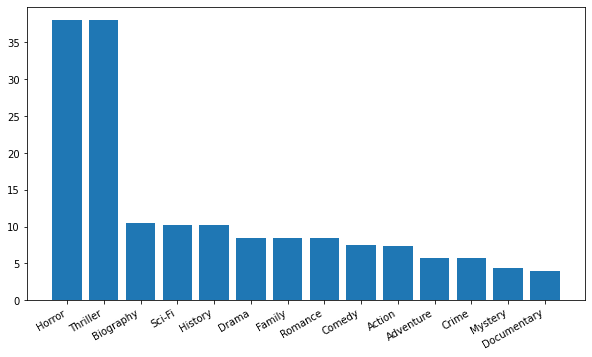

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(genre_roi.keys(), [x['average_roi'] for x in genre_roi.values()])
fig.autofmt_xdate()

I'll turn this dictionary into a df so it can be written and used for visualization

In [44]:
df_genre_roi = pd.DataFrame.from_dict(genre_roi, orient='index').reset_index()
df_genre_roi.rename(columns={'index': 'genre'}, inplace=True)
df_genre_roi

,genre,average_roi,average_cost,count
0,Horror,37.98,1800000,19
1,Thriller,37.98,1800000,15
2,Biography,10.50,1000000,5
3,Sci-Fi,10.28,500000,5
4,History,10.28,500000,3
5,Drama,8.43,450000,51
6,Family,8.43,450000,5
7,Romance,8.43,450000,17
8,Comedy,7.48,50000,18
9,Action,7.30,190000,4


In [45]:
df_genre_roi.to_csv('../data/genre_roi.csv', encoding='utf-8')

# Exploring Franchises and their performance compared to original series


Here we create a new column which determines whether or not the movie is part of a franchise

In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the movie budgets data
tn_budgets = pd.read_csv("../data/tn.movie_budgets.csv")

# Clean monetary columns
tn_budgets['worldwide_gross'] = pd.to_numeric(tn_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', ''), errors='coerce')
tn_budgets['production_budget'] = pd.to_numeric(tn_budgets['production_budget'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# Identify franchises (more comprehensive list)
franchise_keywords = ['Chapter', 'Part', 'Volume', '2', '3', '4', '5', 'Saga', 'Returns', 'Revenge', 
                     'Avengers', 'Batman', 'Spider-Man', 'Star Wars', 'Fast & Furious']

tn_budgets['is_franchise'] = tn_budgets['movie'].apply(lambda x: any(keyword in x for keyword in franchise_keywords))

#print("Dataset Overview:")
#print(tn_budgets.info())

<ipython-input-54-b71bbe645761>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_budgets['worldwide_gross'] = pd.to_numeric(tn_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', ''), errors='coerce')
<ipython-input-54-b71bbe645761>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_budgets['production_budget'] = pd.to_numeric(tn_budgets['production_budget'].str.replace('$', '').str.replace(',', ''), errors='coerce')


Franchise vs Non-Franchise Comparison:
             production_budget       worldwide_gross  ROI
                          mean count            mean mean
is_franchise                                             
False              30223656.25  5400     83570368.21 3.80
True               50870858.12   382    203404478.09 3.78


<Figure size 864x432 with 0 Axes>

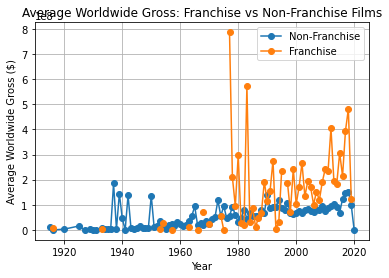

In [55]:
# Add release year and ROI calculations
tn_budgets['year'] = pd.to_datetime(tn_budgets['release_date']).dt.year
tn_budgets['ROI'] = (tn_budgets['worldwide_gross'] - tn_budgets['production_budget']) / tn_budgets['production_budget']

# Compare franchise vs non-franchise performance
comparison = tn_budgets.groupby('is_franchise').agg({
    'production_budget': ['mean', 'count'],
    'worldwide_gross': 'mean',
    'ROI': 'mean'
}).round(2)

print("Franchise vs Non-Franchise Comparison:")
print(comparison)

# Plot average worldwide gross by year for franchise vs non-franchise
plt.figure(figsize=(12, 6))
yearly_performance = tn_budgets.groupby(['year', 'is_franchise'])['worldwide_gross'].mean().unstack()
yearly_performance.plot(kind='line', marker='o')
plt.title('Average Worldwide Gross: Franchise vs Non-Franchise Films')
plt.xlabel('Year')
plt.ylabel('Average Worldwide Gross ($)')
plt.legend(['Non-Franchise', 'Franchise'])
plt.grid(True)

Here we can see that a franchised film tends to do better compared to the non-franchised. This could be something that we explore after we have a footing in the film industry, say after our first few movies

Most Successful Franchise Starters (2010+):
                                    movie  year  production_budget  \
5    Star Wars Ep. VII: The Force Awakens  2015          306000000   
6                  Avengers: Infinity War  2018          300000000   
33                         Jurassic World  2015          215000000   
66                              Furious 7  2015          190000000   
26                           The Avengers  2012          225000000   
3                 Avengers: Age of Ultron  2015          330600000   
41                          Black Panther  2018          200000000   
4       Star Wars Ep. VIII: The Last Jedi  2017          317000000   
112        Jurassic World: Fallen Kingdom  2018          170000000   
155                                Frozen  2013          150000000   

     worldwide_gross  ROI  
5         2053311220 5.71  
6         2048134200 5.83  
33        1648854864 6.67  
66        1518722794 6.99  
26        1517935897 5.75  
3         1403013

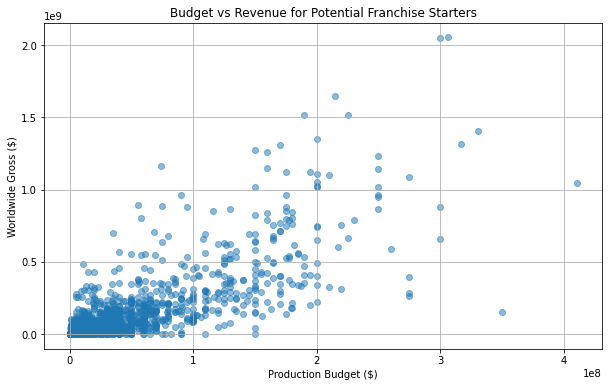

In [60]:
# Look at first movies in franchises (removing sequels)
sequel_indicators = ['2', '3', '4', '5', 'Chapter', 'Part', 'Returns', 'Revenge']
is_sequel = tn_budgets['movie'].apply(lambda x: any(indicator in x for indicator in sequel_indicators))

franchise_starters = tn_budgets[~is_sequel & (tn_budgets['year'] >= 2010)]
print("Most Successful Franchise Starters (2010+):")
print(franchise_starters.nlargest(10, 'worldwide_gross')[['movie', 'year', 'production_budget', 'worldwide_gross', 'ROI']])

# Plot budget vs revenue relationship
plt.figure(figsize=(10, 6))
plt.scatter(franchise_starters['production_budget'], 
           franchise_starters['worldwide_gross'],
           alpha=0.5)
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.title('Budget vs Revenue for Potential Franchise Starters')
plt.grid(True)

Here we can see how the defined budget ranges compare with one another. We can see that While the low range has the highest ROI, its average revenue in billions is actually fairly low compared to the higher ranges. 

<img src='../images/roi_vs_production.png' width='800'>

Here we see that with a medium budget, defined as 125-200 Million, the deviation is by far the lowest, while touting the second highest roi. While the low budget has a slightly higher roi, the deviation is far too wide. As a result, the medium budget is the one we will be looking to allocate.

<img src='../images/roi_distribution.png' width='800'>

When looking at how the genres for the franchised movies compare, we find that animation and family trend pretty high. They also have some of the lowest production cost of all the genres. As a result, these two genres will likely be good choices as we earlier found that pg13 and pg movies tend to do better in the box office. These two genres should perform very well if only limited to pg13 and pg ratings.

<img src='../images/franchise_genre.png' width='800'>